# Run Comparer

In [1]:
from content_opener import open_all_contents, open_contents, Results, Settings, Values, Labels
from typing import List
import matplotlib.pyplot as plt
import numpy as np

datasets:
'CIFAR10',
'CIFAR100'

nets:
'ResNet18'

optimizers:
'SGD',
'Adam',
'AdaSecant'

cycles:
'constantLR',
'100-cycle',
'50-cycle',
'25-cycle'

decays:
'exponentialDecay=False',
'exponentialDecay=True',
'exponentialDecay=maxLR',
'exponentialDecay=slope'


learning rates:
'lr=0.001',
'lr=0.01',
'lr=0.1',
'lr=1',
'lr=3',
'lr=0.01-1',
'lr=0.01-3',
'lr=0.001-1',
'lr=0.001-3'

batch-sizes:
'batch-size=32',
'batch-size=128',
'batch-size=512',
'batch-size=2048'

In [2]:
def compare_runs(settings_list: List[Settings], stop=None, stop_1cycle=False, ylim=(0, 1)):
    results = open_all_contents(settings_list)
    if stop == None:
        stop = len(results[0].values.val_accuracy)
    if stop_1cycle:
        for i in range(len(results)):
            results[i].to_one_cycle()
    for i in range(len(results)):
        plt.plot(results[i].values.val_accuracy[:stop], label=results[i].get_labels().cycle)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.ylim(ylim)
    plt.legend()
    
def plot_cycles(settings_list: List[Settings], stop=None, stop_1cycle=False, ylim=None, in_epochs=False, has_label=True):
    results = open_all_contents(settings_list)
    if stop == None:
        stop = len(results[0].values.lr_history)
    if stop_1cycle:
        for i in range(len(results)):
            results[i].to_one_cycle()
    for i in range(len(results)):
        if has_label:
            label = results[i].get_labels().cycle
        else:
            label = None
        plt.plot(results[i].values.lr_history[:stop], label=label)
    if in_epochs:
        iterations = len(results[0].values.lr_history)
        batch_size = float(results[0].get_labels().batch_size)
        #plt.xticks(np.arange(0, iterations, step=batch_size) / batch_size)
        step = 20 * 50000 / batch_size
        plt.xticks(np.arange(0, iterations + step, step=step), np.arange(0, 101, 20))
        plt.xlabel('Epochs')
    else:
        plt.xlabel('Iterations')
    plt.ylabel('Learning Rate')
    plt.ylim(ylim)
    plt.legend()

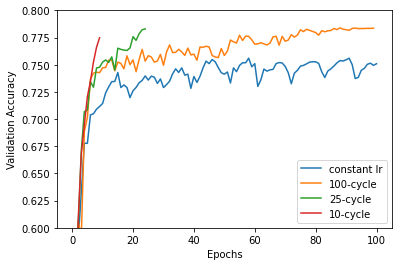

In [3]:
settings_list = []

dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'
clr = 'lr=0.01-1'
batch_size = 'batch-size=128'

settings_list.append(Settings(dataset, net, optimizer, 'constantLR', decay, lr, batch_size))
settings_list.append(Settings(dataset, net, optimizer, '100-cycle', decay, clr, batch_size))
settings_list.append(Settings(dataset, net, optimizer, '25-cycle', decay, clr, batch_size))
settings_list.append(Settings(dataset, net, optimizer, '10-cycle', decay, clr, batch_size))

compare_runs(settings_list, stop_1cycle=True, ylim=(0.6, 0.8))

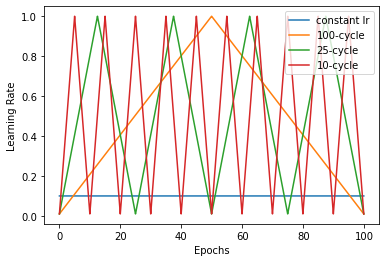

In [4]:
plot_cycles(settings_list, stop_1cycle=False, in_epochs=True)

No handles with labels found to put in legend.


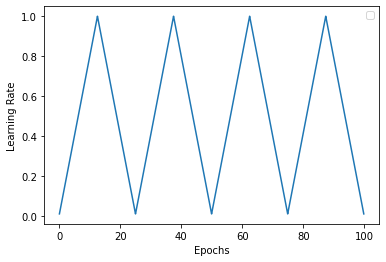

In [5]:
plot_cycles([Settings(dataset, net, optimizer, '25-cycle', decay, clr, batch_size)], 
            stop_1cycle=False,
            in_epochs=True,
            has_label=False)